<a href="https://colab.research.google.com/github/Pratik972/EDA-Air-bnb-booking-analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from datetime import datetime
from datetime import date
import seaborn as sns


In [ ]:
#lets start with mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the file
airbnb_file_path = '/content/drive/MyDrive/project/'
df_airbnb = pd.read_csv(airbnb_file_path +'Airbnb NYC 2019.csv')

In [ ]:
df_airbnb.shape

(48895, 16)

In [ ]:
#Getting to know the inputs on head and tail of data set

df_airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
df_airbnb.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Gathering information on data set
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Data Cleaning

In [ ]:
# calling all the columns of data set
df_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#now we are keeping columns from dataframe which  will benefits our analysis
df_airbnb = df_airbnb[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

In [ ]:
#now checking new head and tail of our revised data set
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df_airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#we are filling null values of 'name'column with "not known" and 'host name' column with "not present"
df_airbnb['name'].fillna('not known',inplace = True)
df_airbnb['host_name'].fillna('not present',inplace = True)

In [ ]:
#checking if all null values has been eliminated
df_airbnb.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

So as we can see that there are no null or nan values left in our data set

In [ ]:
#Descriptive information on our data set
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


As we can see that there are maximum price of an airbnb property is 10000 but the minimum price of any property is 0 and that can not be possible so we need to make some changes in data set

In [ ]:

#we are replacing the 0 values in price column with median of rest of the non zero prices.
median1 = df_airbnb['price'].median()
df_airbnb['price'] = df_airbnb['price'].replace(0,median1)

In [ ]:
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.744534,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.144266,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


So here we fill the 0 values in "price" column with the median of "price" column

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

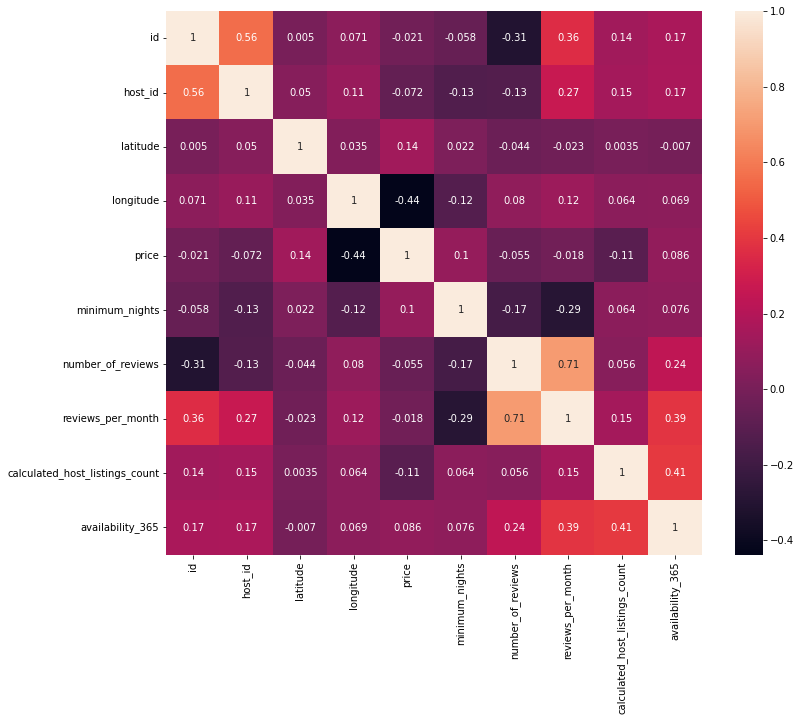

In [ ]:
# Building a correlation graph
corr = df_airbnb.corr(method='spearman')
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
df_airbnb.columns

there are various correlation we can see tht. if availability increase so listing count will also increase we can see tht in our heatmap they both correlated with(0.24).so through same process we can find the correlation between every columns.

Data analysis

1.What can we learn about diffrent hosts and areas?

In [ ]:
#Here we are performing groupby  and sorting result by descending
df1 = df_airbnb.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()
df2 = df1.sort_values('calculated_host_listings_count',ascending = False)
area_count = df2.head(10)

In [ ]:
area_count

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159
6808,John,Manhattan,151
3249,David,Brooklyn,142
7275,Kara,Manhattan,135
432,Alex,Manhattan,134
9856,Mike,Manhattan,134


Text(0, 0.5, 'calculated_host_listings_count')

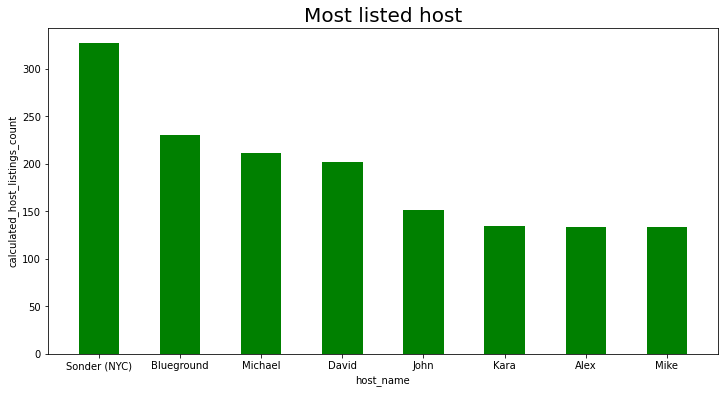

In [ ]:
# data visualization(bar)
plt.rcParams['figure.figsize'] = (12, 6)
plt.bar(area_count['host_name'],area_count['calculated_host_listings_count'],color = 'green',width = 0.5)
plt.title('Most listed host',{'fontsize':20})
plt.xlabel('host_name')
plt.ylabel('calculated_host_listings_count')

We can see from tha bar chart that most number of listing are from Manhattan by host_name Sonder(NYC) followed by Blueground and Michael.

2.What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
#first we ll work with prices
prices_room_type =df_airbnb.groupby('room_type').agg({'price':['max','mean'],'id':'count'}).reset_index()

In [ ]:
prices = prices_room_type.head()
prices

room_type  price                 id
                      max        mean  count
0  Entire home/apt  10000  211.802590  25409
1     Private room  10000   89.814208  22326
2      Shared room   1800   70.310345   1160

As here is id's count is number of room type and with the this we can easily predict tht because of heavy requirment of entire home & private rooms,mean price of them are on higher side

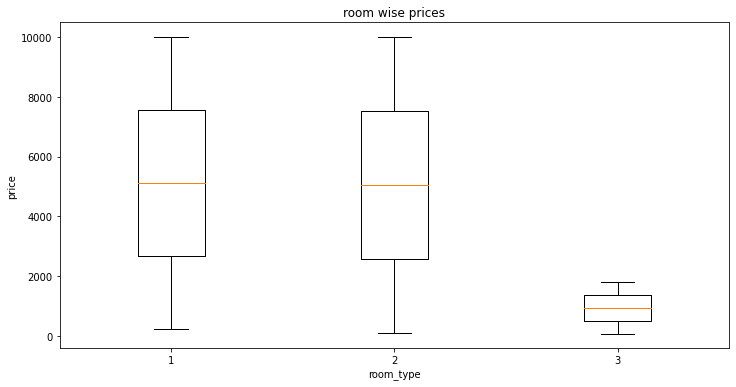

In [ ]:
#data visualization(boxplot)
plt.boxplot(prices_room_type['price'])
plt.title('room wise prices')
plt.xlabel('room_type')
plt.ylabel('price')
plt.show()

In [ ]:
#Getting the avg price of Airbnb in different neighbourhood group
avg_price = df_airbnb.groupby('neighbourhood_group').agg({'price':['mean']})
avg_price

,price
,mean
neighbourhood_group,
Bronx,87.593951
Brooklyn,124.430661
Manhattan,196.880707
Queens,99.517649
Staten Island,114.812332


Here we can see that avg or mean price of Manhattan are on higher side and Bronx and queens avg price is on lower side

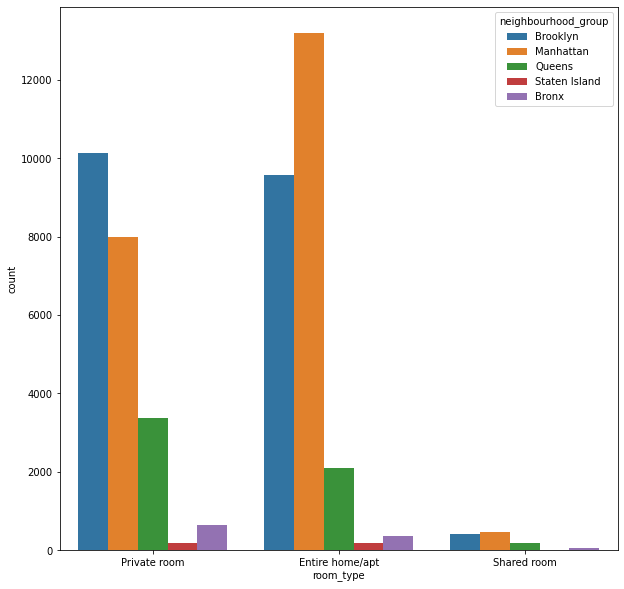

In [ ]:
#room type distribution in the neighbourhood group by counterplot.
plt.figure(figsize=(10,10))
ax = sns.countplot(x="room_type", data=df_airbnb,hue="neighbourhood_group")

From above visualizations we can say that there are very few shared room cause its demand is very low .brooklyn has the highest number of private rooms and Manhattan has most number of entire home/apt

3. Which hosts are busiest and why?

In [ ]:
#Performing groupby to know the number of minimum nights host are hosting and sorting the result in descending order
df3 = df_airbnb.groupby(['host_name','room_type'])['minimum_nights'].count().reset_index()

In [ ]:
df4 = df3.sort_values('minimum_nights',ascending = False)
df5 = df4.head(10)
df5

,host_name,room_type,minimum_nights
12508,Sonder (NYC),Entire home/apt,319
9171,Michael,Entire home/apt,251
1744,Blueground,Entire home/apt,232
3084,David,Entire home/apt,214
3085,David,Private room,184
413,Alex,Entire home/apt,175
6415,John,Private room,153
9172,Michael,Private room,152
9281,Mike,Entire home/apt,141
6414,John,Entire home/apt,135


Text(0, 0.5, 'minimum night stay')

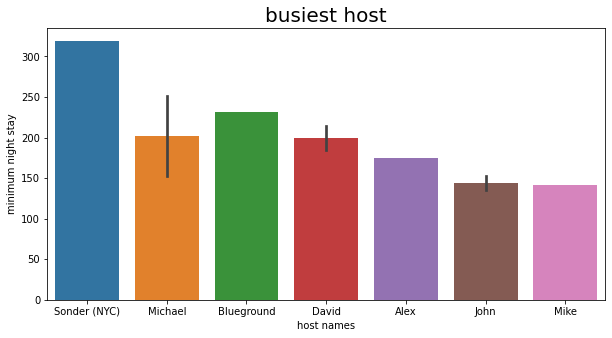

In [ ]:
#data visualization(barplot)
plt.rcParams['figure.figsize'] = (10,5)
z = sns.barplot(x = df5['host_name'],y = df5['minimum_nights'])
z.set_title('busiest host',{'fontsize':20})
z.set_xlabel('host names')
z.set_ylabel('minimum night stay')

4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
#performing groupby
df6 = df_airbnb.groupby(['neighbourhood_group','room_type']).agg({'minimum_nights':'count'}).reset_index()
traffic_areas = df6.sort_values('minimum_nights',ascending = False)
traffic_areas.head()

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372


In [ ]:
traffic_areas.tail()

,neighbourhood_group,room_type,minimum_nights
11,Queens,Shared room,198
13,Staten Island,Private room,188
12,Staten Island,Entire home/apt,176
2,Bronx,Shared room,60
14,Staten Island,Shared room,9


We can see the most traffic is in Manhattan and Brooklyn and the less number of traffic is in staten island .we knoe tht brooklyn has to so many places to visit and hav more number of rooms

5.Which properties are most preferable?

In [ ]:
#performing groupby on number of reviews and sorting the result
df10 = df_airbnb.groupby('name')['number_of_reviews'].sum().reset_index()

In [ ]:
reviews = df10.sort_values(	'number_of_reviews',ascending=False)
no_of_reviews = reviews.head()
no_of_reviews 

,name,number_of_reviews
32777,Private Bedroom in Manhattan,666
36516,Room near JFK Queen Bed,629
5722,Beautiful Bedroom in Manhattan,617
20860,Great Bedroom in Manhattan,607
36161,Room Near JFK Twin Beds,576


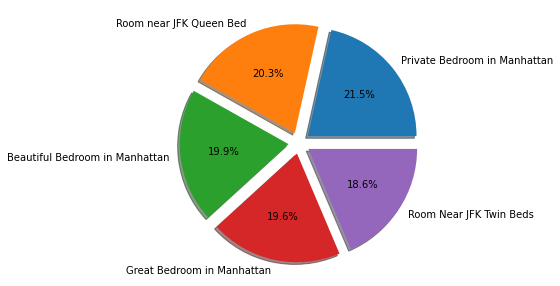

In [ ]:
#data visualization(piechart)
plt.pie(no_of_reviews['number_of_reviews'],labels=no_of_reviews['name'],explode=[0.1,0.1,0.1,0.1,0.1],autopct ='%2.1f%%',shadow = True)

plt.show()

6.How many properties are availabel for more thn 200 days?

In [ ]:
#getting the values where availabilities of room are  more than 200 days
often_availabel = df_airbnb[df_airbnb['availability_365'] >= 200]

In [ ]:
often_availabel['availability_365'].count()

13368

In [ ]:
#calculating the percentage 
percent_availabel_more =often_availabel['availability_365'].count()/df_airbnb['availability_365'].count()*100
percent_availabel_more.round(2)

27.34

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'density')

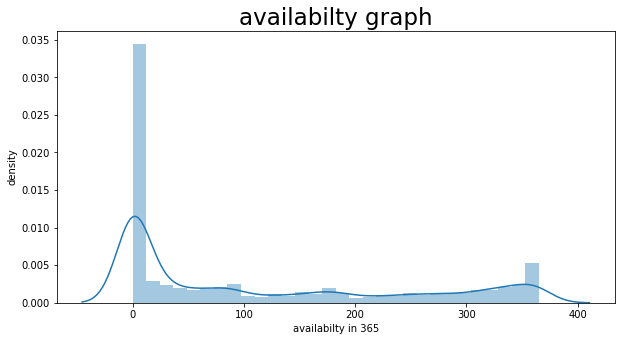

In [ ]:
#data visualization(displot)
a=sns.distplot(df_airbnb['availability_365'])
a.set_title('availabilty graph',{'fontsize':23})
a.set_xlabel('availabilty in 365')
a.set_ylabel('density')

7 -Which neighbourhood group has highest number of airbnb?

In [ ]:
#so as we know tht all airbnb have different id so we can check with tht
df11 = df_airbnb.groupby('neighbourhood_group')['id'].count().reset_index()
#here id the number of airbnb 
df11.sort_values('id',ascending = False)

,neighbourhood_group,id
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


Text(0, 0.5, 'number of airbnb')

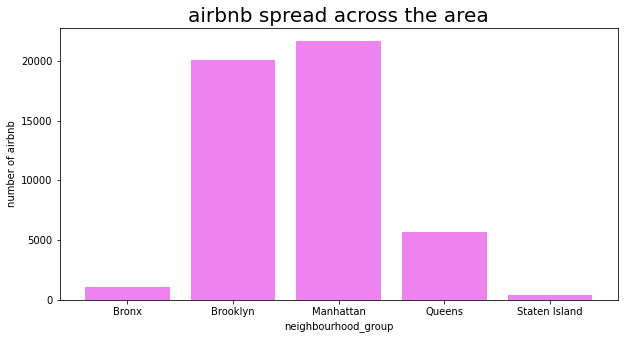

In [ ]:
#here id represent the number of airbnb present in tht neighbourhood group
#now plot
plt.bar(df11['neighbourhood_group'],df11['id'],color = 'violet')
plt.title('airbnb spread across the area',{'fontsize': 20})
plt.xlabel('neighbourhood_group')
plt.ylabel('number of airbnb')


SO here we can see tht manhattan has the most number of airbnb after then brooklyn has the second place.Bronx and staten island have very less number of airbnb present